**SENTIMENT ANALYSIS OF IPHONE7**

##### **Dataset**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("iphone_7.csv")

In [ ]:
df.head()

,Unnamed: 0,Customer_name,Reviewed_date,Ratings,Reviews,Review_title
0,0,Bharath Kumar,7 March 2019,5.0 out of 5 stars,i received defective iphone 7 32GB silver co...,Buy iPhone SE 2020
1,1,jaywant,29 October 2018,1.0 out of 5 stars,Thanks for Amazon service. phone is very nic...,Good
2,2,jaywant,29 October 2018,1.0 out of 5 stars,"Redmi phones cameras are great, of course iP...",Great phone...
3,3,Bharath Kumar,7 March 2019,5.0 out of 5 stars,If you are an apple fan !! This is a true be...,Good
4,4,Utpal Das,13 November 2018,5.0 out of 5 stars,in 20 days i found my battery health 98% whi...,Wow


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5352 entries, 0 to 5351
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     5352 non-null   int64 
 1   Customer_name  5352 non-null   object
 2   Reviewed_date  5352 non-null   object
 3   Ratings        5352 non-null   object
 4   Reviews        4452 non-null   object
 5   Review_title   10 non-null     object
dtypes: int64(1), object(5)
memory usage: 251.0+ KB


In [ ]:
df.columns

Index(['Unnamed: 0', 'Customer_name', 'Reviewed_date', 'Ratings', 'Reviews',
       'Review_title'],
      dtype='object')

##### **Feature Selection**

1. **Remove effectless features**
2. **Punctuation removal**
3. **Positive:1, Neutral:0, Negative:-1**
4. **Stopwords removal**
5. **Tokenizer**

In [ ]:
df.isna().sum()

Unnamed: 0          0
Customer_name       0
Reviewed_date       0
Ratings             0
Reviews           900
Review_title     5342
dtype: int64

In [ ]:
df.head()

,Unnamed: 0,Customer_name,Reviewed_date,Ratings,Reviews,Review_title
0,0,Bharath Kumar,7 March 2019,5.0 out of 5 stars,i received defective iphone 7 32GB silver co...,Buy iPhone SE 2020
1,1,jaywant,29 October 2018,1.0 out of 5 stars,Thanks for Amazon service. phone is very nic...,Good
2,2,jaywant,29 October 2018,1.0 out of 5 stars,"Redmi phones cameras are great, of course iP...",Great phone...
3,3,Bharath Kumar,7 March 2019,5.0 out of 5 stars,If you are an apple fan !! This is a true be...,Good
4,4,Utpal Das,13 November 2018,5.0 out of 5 stars,in 20 days i found my battery health 98% whi...,Wow


In [ ]:
df.shape

(5352, 6)

In [ ]:
df.isna().sum()

Unnamed: 0          0
Customer_name       0
Reviewed_date       0
Ratings             0
Reviews           900
Review_title     5342
dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
df1["Reviews"] = df1["Reviews"].fillna(method='ffill')

In [ ]:
df1.isna().sum()

Unnamed: 0          0
Customer_name       0
Reviewed_date       0
Ratings             0
Reviews             0
Review_title     5342
dtype: int64

In [ ]:
df1

,Unnamed: 0,Customer_name,Reviewed_date,Ratings,Reviews,Review_title
0,0,Bharath Kumar,7 March 2019,5.0 out of 5 stars,i received defective iphone 7 32GB silver co...,Buy iPhone SE 2020
1,1,jaywant,29 October 2018,1.0 out of 5 stars,Thanks for Amazon service. phone is very nic...,Good
2,2,jaywant,29 October 2018,1.0 out of 5 stars,"Redmi phones cameras are great, of course iP...",Great phone...
3,3,Bharath Kumar,7 March 2019,5.0 out of 5 stars,If you are an apple fan !! This is a true be...,Good
4,4,Utpal Das,13 November 2018,5.0 out of 5 stars,in 20 days i found my battery health 98% whi...,Wow
...,...,...,...,...,...,...
5347,5347,Jijo,28 May 2020,5.0 out of 5 stars,Overall performance is very poor,NaN
5348,5348,S. G.,17 April 2021,1.0 out of 5 stars,Overall performance is very poor,NaN
5349,5349,Valentino Pereira,9 May 2021,4.0 out of 5 stars,Overall performance is very poor,NaN
5350,5350,Madhulika,27 April 2021,5.0 out of 5 stars,Overall performance is very poor,NaN


In [ ]:
df.isna().sum()

Unnamed: 0          0
Customer_name       0
Reviewed_date       0
Ratings             0
Reviews           900
Review_title     5342
dtype: int64

**Filling the text sector isn't a viable option, as ratings and review statements doesn't coalesce together nor make sense**

**Hence, dropping the missing values is an acceptable course of action. Doing so, doesn't have a regretting impact on the dataset too**

In [ ]:
df.isna().sum()

Unnamed: 0          0
Customer_name       0
Reviewed_date       0
Ratings             0
Reviews           900
Review_title     5342
dtype: int64

In [ ]:
def feature_engineering(df):
  
  # 1. Feature Selection
  del df["Unnamed: 0"]
  del df["Customer_name"]
  del df["Reviewed_date"]
  del df["Review_title"]
  del df["Ratings"]
  df = df.dropna()
  # df['Ratings'].replace(to_replace=['5.0 out of 5 stars','4.0 out of 5 stars','3.0 out of 5 stars','2.0 out of 5 stars','1.0 out of 5 stars'], value=[1,1,0,-1,-1],inplace=True)
  # df.rename(columns={"Ratings":"Categories"}, inplace=True)

  # 2. Punctuation removal
  import string
  def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, "")
    return text
  df["Punctuation removed"] = df["Reviews"].apply(remove_punctuations)
  
  # 3. Stopwords
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  stop = set(nltk.corpus.stopwords.words("english"))
  
  def stopwords_fn(text):
    stop_words_removed = ' '.join([word for word in text.split() if word not in stop])
    return stop_words_removed
  df["Stops removed"] = df["Punctuation removed"].apply(stopwords_fn)

  # 4. Lemmatize
  from nltk.stem import WordNetLemmatizer
  nltk.download('wordnet')
  nltk.download('averaged_perceptron_tagger')
  lemmatizer  = WordNetLemmatizer()
  w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

  def lemma_fn(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
  df["Lemmized"] = df["Stops removed"].apply(lemma_fn)

  del df["Reviews"]
  df.rename(columns={"Lemmized":"Reviews"}, inplace=True)
  df['Reviews'] = [" ".join(review) for review in df['Reviews'].values]
  del df["Punctuation removed"]
  del df["Stops removed"]

  # 5. TextBlob
  import textblob
  from textblob import TextBlob
  
  def tb(text):
    out = TextBlob(text).sentiment.polarity
    if out == 0:
      op = 0
    elif out > 0:
      op = 1
    else:
      op = -1

    return op
  df["Ratings"] = df["Reviews"].apply(tb)

  return df

In [ ]:
df = feature_engineering(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [ ]:
df.head()

,Reviews,Ratings
0,received defective iphone 7 32GB silver colour...,1
1,Thanks Amazon service phone nice cool also dis...,1
2,Redmi phone camera great course iPhone better ...,1
3,If apple fan This true beauty go,1
4,20 day found battery health 98 disappointing e...,-1


In [ ]:
df.isna().sum()

Reviews    0
Ratings    0
dtype: int64

In [ ]:
df.shape

(4452, 2)

In [ ]:
# df = df.assign(new_column=pd.cut(df['Ratings'], 
#                                  bins=[0, 2, 3.5, 999], 
#                                  labels=['Negative', 'Neutral', 'Positive']))

In [ ]:
df

,Reviews,Ratings
0,received defective iphone 7 32GB silver colour...,1
1,Thanks Amazon service phone nice cool also dis...,1
2,Redmi phone camera great course iPhone better ...,1
3,If apple fan This true beauty go,1
4,20 day found battery health 98 disappointing e...,-1
...,...,...
4455,ProsMy previous I phone 6 I lost market make p...,1
4456,Apple selling low quality product India,0
4457,I bought phone I wanted simple iphone But sinc...,1
4458,Buy iPhone Xr saving bit,0


##### **The Split**

In [ ]:
X = df[["Reviews"]]
y = df["Ratings"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

##### **Balance Check**

In [ ]:
from collections import Counter
Counter(y_train)

Counter({-1: 482, 0: 660, 1: 2419})

(array([ 482.,    0.,    0.,    0.,    0.,  660.,    0.,    0.,    0.,
        2419.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

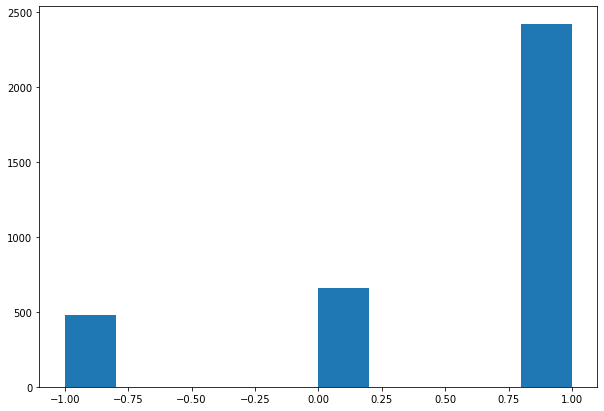

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(y_train)

**As seen above, balancing the target labels is a must**

In [ ]:
# Upsampling

train = pd.concat([X_train, y_train], axis = 1)
test  = pd.concat([X_test, y_test], axis = 1)

neutral_train = train[train["Ratings"]==0]
negtive_train = train[train["Ratings"]==-1]
postive_train = train[train["Ratings"]==1]

from sklearn.utils import resample
neutral_upsampled = resample(neutral_train, replace=True, n_samples=2417)
negtive_upsampled = resample(negtive_train, replace=True, n_samples=2417)

train_upsampled = pd.concat([neutral_upsampled, negtive_upsampled, postive_train])

In [ ]:
train_upsampled.isna().sum()

Reviews    0
Ratings    0
dtype: int64

In [ ]:
Counter(train_upsampled["Ratings"])

Counter({-1: 2417, 0: 2417, 1: 2419})

(array([2417.,    0.,    0.,    0.,    0., 2417.,    0.,    0.,    0.,
        2419.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

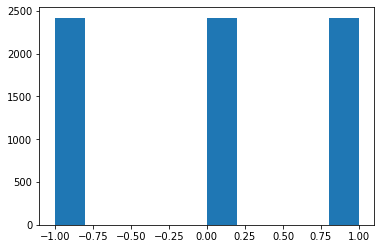

In [ ]:
plt.hist(train_upsampled["Ratings"])

**As seen above, training data is successfully balanced**

**Now, the split is conducted - predictor and target variable**

In [ ]:
train_upsampled.shape

(7253, 2)

In [ ]:
# Train - Predictor Vs. Target

X_train = train_upsampled[["Reviews"]]
y_train = train_upsampled["Ratings"]

##### **Vectorization**

In [ ]:
# Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer(min_df=1, lowercase = True)

In [ ]:
X_train_features = feature_extraction.fit_transform(X_train["Reviews"])

In [ ]:
X_test_features = feature_extraction.transform(X_test["Reviews"])

In [ ]:
print(X_train_features)

  (0, 3407)	0.5846215713810434
  (0, 1436)	0.8113061187221254
  (1, 3728)	0.6054807556563835
  (1, 6066)	0.7958599465545273
  (2, 550)	0.4577776892078391
  (2, 1203)	0.45540901186711913
  (2, 3403)	0.4331223074747691
  (2, 4001)	0.5078003234964652
  (2, 1114)	0.3709260268549001
  (3, 4116)	0.6751785849788031
  (3, 3728)	0.4466354879339149
  (3, 6066)	0.5870695182889801
  (4, 3705)	0.2418836661188385
  (4, 970)	0.5054377657987371
  (4, 1375)	0.5054377657987371
  (4, 5108)	0.45097143861301553
  (4, 5716)	0.33615757712668515
  (4, 5733)	0.33790600286070127
  (5, 6049)	0.356438777895804
  (5, 1872)	0.2185294890519194
  (5, 1359)	0.356438777895804
  (5, 3371)	0.2815955336935858
  (5, 5496)	0.21227909889685304
  (5, 752)	0.1304517524587482
  (5, 2601)	0.18210372078284315
  :	:
  (7252, 6163)	0.16364356501995778
  (7252, 5248)	0.1609352335212466
  (7252, 1031)	0.10957547585264688
  (7252, 617)	0.1348372315009845
  (7252, 6187)	0.14038256993729906
  (7252, 493)	0.13443024316089774
  (7252, 261

##### **Model building phase**

##### **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_features, y_train)

LinearRegression()

In [ ]:
# Prediction

y_pred = lr.predict(X_test_features)
y_pred = y_pred.round()

In [ ]:
# Classification Metrics

lr.score(X_test_features, y_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.6105499438832772

##### **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()

lor.fit(X_train_features, y_train)

LogisticRegression()

In [ ]:
# Prediction

y_pred = lor.predict(X_test_features)
y_pred = y_pred.round()

In [ ]:
# Classification metrics

lor.score(X_test_features, y_test)

0.8821548821548821

In [ ]:
accuracy_score(y_pred, y_test)

0.8821548821548821

##### **DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(X_train_features, y_train)

DecisionTreeClassifier()

In [ ]:
# Prediction

y_pred = tree.predict(X_test_features)

In [ ]:
# Classification metrics

tree.score(X_test_features, y_test)

0.8698092031425365

In [ ]:
accuracy_score(y_pred, y_test)

0.8698092031425365

##### **KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train_features, y_train)

KNeighborsClassifier()

In [ ]:
# Prediction

y_pred = knn.predict(X_test_features)

In [ ]:
# Classification metrics

knn.score(X_test_features, y_test)

0.5218855218855218

In [ ]:
accuracy_score(y_pred, y_test)

0.5218855218855218

##### **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train_features, y_train)

RandomForestClassifier()

In [ ]:
# PREDICTION

y_pred = rfc.predict(X_test_features)

In [ ]:
# CLASSIFICATION METRICS

rfc.score(X_test_features, y_test)

0.8855218855218855

In [ ]:
rfc.score(X_test_features, y_test)

0.8855218855218855

In [ ]:
print(rfc.max_depth)

None


**Hyperparameter tuning**

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
# Hyperparameter Tuning - RandomizedSearchCV

import numpy as np

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 
max_depth.append(None)
bootstrap = [True, False]
param_distributions =  {'n_estimators': n_estimators,
                        'max_depth' : 15,
                        'max_features': max_features,
                        'max_depth': max_depth,
                        'bootstrap': bootstrap}

print(param_distributions)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'bootstrap': [True, False]}


In [ ]:
rfc_random = RandomizedSearchCV(estimator=rf_model, 
                                param_distributions=param_distributions, 
                                n_iter = 20, 
                                scoring='neg_mean_absolute_error', 
                                cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

In [ ]:
rfc_random.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator': RandomForestClassifier(),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'n_iter': 20,
 'n_jobs': -1,
 'param_distributions': {'bootstrap': [True, False],
  'max_depth': [5, 10, None],
  'max_features': ['auto', 'log2'],
  'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
 'pre_dispatch': '2*n_jobs',
 'random_state': 42,
 'refit': True,
 'return_train_score': True,
 'scoring': 'neg_mean

In [ ]:
rfc_random.fit(X_train_features, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
# Prediction

y_pred_rand = rfc_random.predict(X_test_features)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred_rand, y_test)

0.8619528619528619

In [ ]:
# classification metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score of Test Dataset - ", accuracy_score(y_pred_rand, y_test))        #model.score(X_test_features, y_test)
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_pred_rand, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_pred_rand, y_test))

1. Accuracy Score of Test Dataset -  0.8619528619528619


2. Confusion Matrix - 
 [[ 67   9  11]
 [ 11 127  30]
 [ 41  21 574]]


3. Classification_report - 

               precision    recall  f1-score   support

          -1       0.56      0.77      0.65        87
           0       0.81      0.76      0.78       168
           1       0.93      0.90      0.92       636

    accuracy                           0.86       891
   macro avg       0.77      0.81      0.78       891
weighted avg       0.87      0.86      0.87       891



##### **SupportVectorMachines**

In [ ]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train_features, y_train)

SVC()

In [ ]:
# Prediction

y_pred = svm.predict(X_test_features)

In [ ]:
# Classification Metrics

svm.score(X_test_features, y_test)

0.8855218855218855

In [ ]:
accuracy_score(y_pred, y_test)

0.8855218855218855

**Hyperparameter tuning**

In [ ]:
# Hyperparameter tuning - GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
              'C' : [0.1, 1, 10, 100, 1000],
              'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
              'gamma' : ['scale', 'auto'],
              'kernel' : ['linear', 'rbf', 'poly', 'sigmoid', 'nonlinear']
              }

grid = GridSearchCV(svm, param_grid, refit=True, cv=3, verbose=0)   # n_jobs=

In [ ]:
grid.fit(X_train_features, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 342, in _sparse_fit
    kernel_type = self._sparse_kernels.index(kernel)
ValueError: 'n

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid',
                                    'nonlinear']})

In [ ]:
grid.score(X_train_features, y_train)

0.9995872317006054

In [ ]:
grid.score(X_test_features, y_test)

0.8877665544332211

In [ ]:
# Prediction

y_pred = grid.predict(X_test_features)

In [ ]:
accuracy_score(y_pred, y_test)

0.8877665544332211

##### **AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada.fit(X_train_features, y_train)

AdaBoostClassifier()

In [ ]:
# Prediction

y_pred = ada.predict(X_test_features)

In [ ]:
# Classification Metrics

print("Train score of AdaBoostClassifier -", ada.score(X_train_features, y_train))
print("Test score of AdaBoostClassifier -", ada.score(X_test_features, y_test))

Train score of AdaBoostClassifier - 0.8882773802971932
Test score of AdaBoostClassifier - 0.8496071829405163


**Hyperparameter tuning**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators" : [1, 2]
             }


DTC = DecisionTreeClassifier(random_state = 11)       #, max_features = "auto", class_weight = "auto",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

In [ ]:
grid_ABC.fit(X_train_features, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:775: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:775: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/l

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=11)),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'n_estimators': [1, 2]},
             scoring='roc_auc')

In [ ]:
# grid_ABC.score(X_train_features, y_train)

##### **GradientBoostingAlgorithm**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier()

grad.fit(X_train_features, y_train)

GradientBoostingClassifier()

In [ ]:
# Prediction

y_pred = grad.predict(X_test_features)

In [ ]:
accuracy_score(y_pred, y_test)

0.8529741863075196

##### **XGBClassifier**

In [ ]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train_features, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
# Prediction

y_pred = xgb.predict(X_test_features)

In [ ]:
# Classification metrics

xgb.score(X_test_features, y_test)

0.8181818181818182

##### **Inferred model**

The model selected for deployment is - **RandomForestClassifier**